In [161]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import scikeras

In [162]:
df = pd.read_csv('Alphabets_data.csv')

In [163]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [164]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [165]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [166]:
print("Class Distribution:\n", df['letter'].value_counts())

Class Distribution:
 letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [167]:
X = df.drop('letter', axis=1)

In [168]:
y = df['letter']

In [169]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [170]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [171]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['letter'])

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [173]:
def create_model(activation='relu', neurons=32, optimizer='adam'):

    model = keras.Sequential()  # Create a new Keras Sequential model here
    model.add(Dense(neurons, activation=activation, input_dim=X_train.shape[1]))  # Add the input layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [174]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=1)
model.fit(X_train, y_train)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0346 - loss: -50.7861
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0369 - loss: -669.6631
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0396 - loss: -2240.8987
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0370 - loss: -4601.2178
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0401 - loss: -7527.2964
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0368 - loss: -11105.5732
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0387 - loss: -15294.2090
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0387 - loss: -19883.4141
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0374 - loss: -24850.3906
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0360 - loss: -31022.2480


KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7aa8553ea710>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [175]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [176]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Initial Model Performance:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}")

Initial Model Performance:
Accuracy: 0.03725
Precision: 0.0013875625000000001
Recall: 0.03725
F1-score: 0.002675463967221017


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [177]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [178]:
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': [32, 64, 128]
}

In [151]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

In [152]:
print(f"Best Parameters: {grid_result.best_params_}")

Best Parameters: {'batch_size': 16, 'epochs': 10, 'model__activation': 'relu', 'model__neurons': 32, 'optimizer': 'adam'}


In [153]:
best_model = grid_result.best_estimator_
y_pred_tuned = (best_model.predict(X_test) > 0.5).astype(int)

In [154]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [155]:
print(f"Tuned Model Performance:\nAccuracy: {accuracy_tuned}\nPrecision: {precision_tuned}\nRecall: {recall_tuned}\nF1-score: {f1_tuned}")

Tuned Model Performance:
Accuracy: 0.03725
Precision: 0.0013875625000000001
Recall: 0.03725
F1-score: 0.002675463967221017


In [156]:
print("\nComparison between Default and Tuned Models:")
print(f"Accuracy - Default: {accuracy} | Tuned: {accuracy_tuned}")
print(f"Precision - Default: {precision} | Tuned: {precision_tuned}")
print(f"Recall - Default: {recall} | Tuned: {recall_tuned}")
print(f"F1-score - Default: {f1} | Tuned: {f1_tuned}")


Comparison between Default and Tuned Models:
Accuracy - Default: 0.03725 | Tuned: 0.03725
Precision - Default: 0.0013875625000000001 | Tuned: 0.0013875625000000001
Recall - Default: 0.03725 | Tuned: 0.03725
F1-score - Default: 0.002675463967221017 | Tuned: 0.002675463967221017


In [157]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

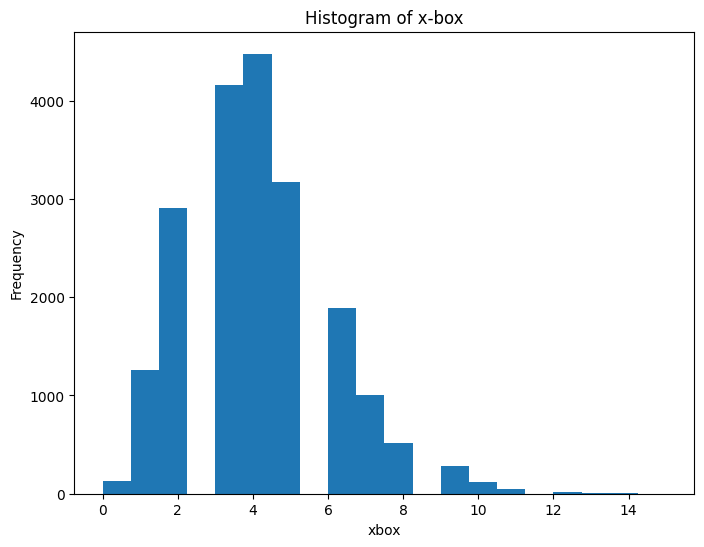

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of a feature (e.g., 'x-box')
plt.figure(figsize=(8, 6))
plt.hist(df['xbox'], bins=20)
plt.xlabel('xbox')
plt.ylabel('Frequency')
plt.title('Histogram of x-box')
plt.show()


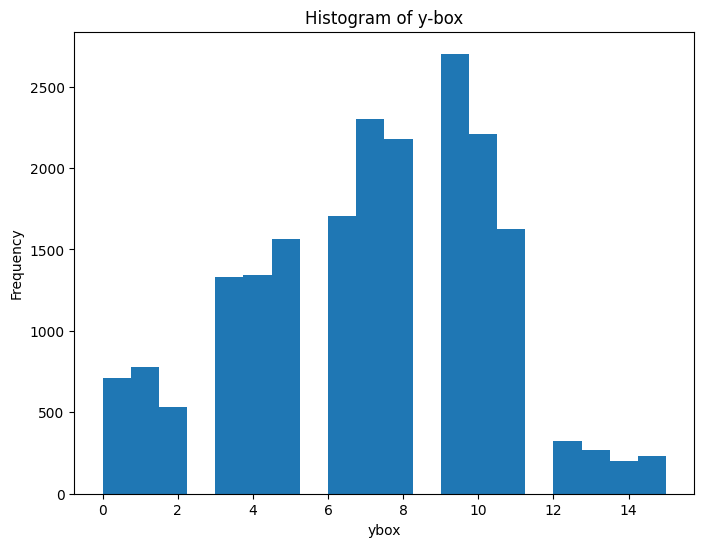

In [160]:
plt.figure(figsize=(8, 6))
plt.hist(df['ybox'], bins=20)
plt.xlabel('ybox')
plt.ylabel('Frequency')
plt.title('Histogram of y-box')
plt.show()

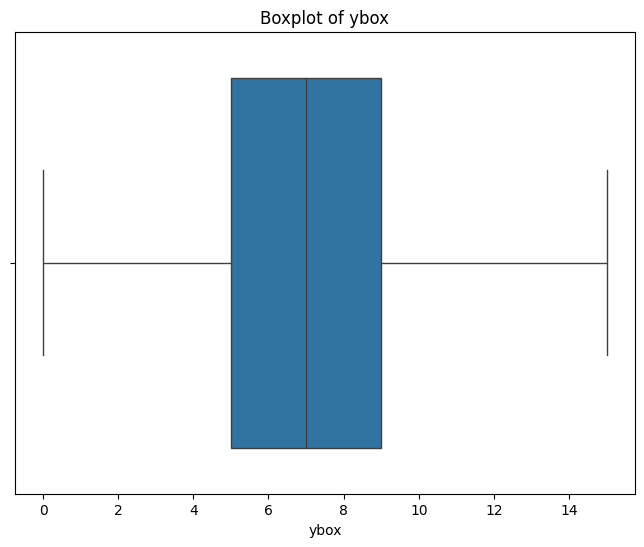

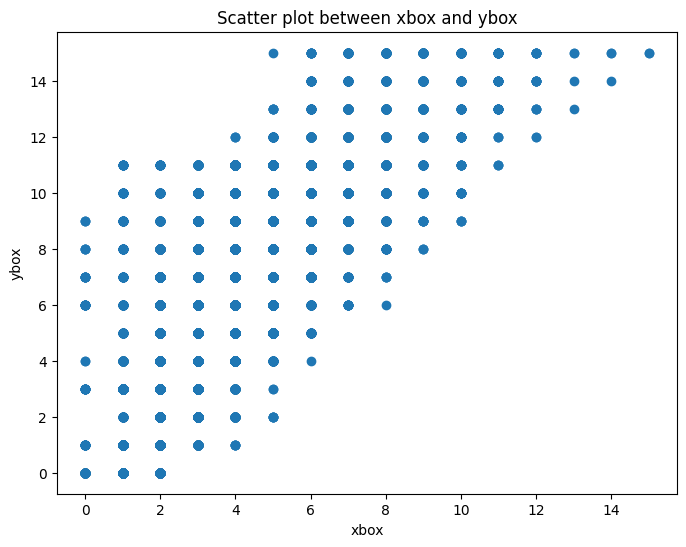

In [159]:
# Boxplot of a feature (e.g., 'y-box')
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ybox'])
plt.xlabel('ybox')
plt.title('Boxplot of ybox')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(df['xbox'], df['ybox'])
plt.xlabel('xbox')
plt.ylabel('ybox')
plt.title('Scatter plot between xbox and ybox')
plt.show()